This dataset comes from: https://archive.ics.uci.edu/dataset/45/heart+disease

It contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

The **"goal" field refers to the presence of heart disease in the patient**. It is integer valued **from 0 (no presence) to 4**.

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Libraries

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [19]:
heart_disease.values

<function dotdict.values()>

## Features Decriptions

In [4]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


<Axes: xlabel='chol', ylabel='Count'>

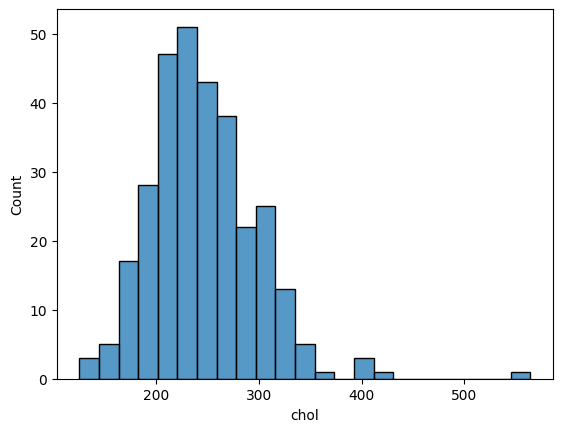

In [31]:
sns.histplot(data = df, x = 'chol')

## Dataset

In [5]:
df = pd.DataFrame(heart_disease['data']['features'])

In [6]:
df['ill'] = heart_disease['data']['targets']

In [7]:
df['ill'] = (df['ill'] > 0).astype(int)

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ill
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [16]:
df['cp'].unique()

array([1, 4, 3, 2])

## Exploratory Descritive Analysis

### Age

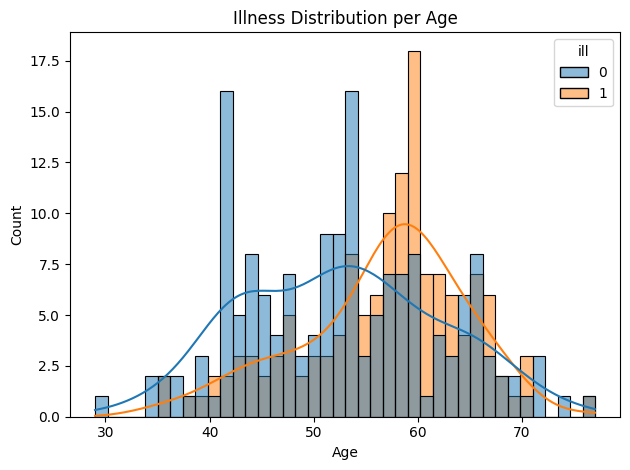

In [9]:
sns.histplot(data = df, x = 'age', kde = True, bins = 40, stat='count', hue = 'ill')
plt.xlabel('Age')
plt.title('Illness Distribution per Age')
plt.tight_layout()
plt.show()

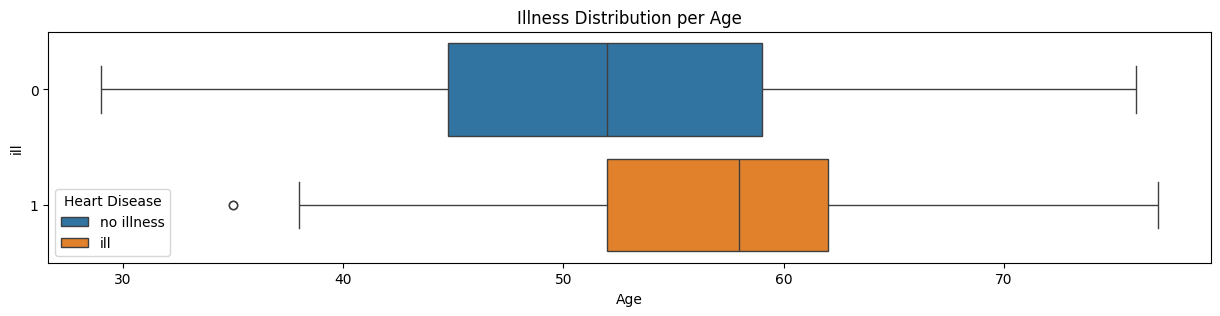

In [10]:
fig, ax = plt.subplots(figsize=(15,3))
sns.boxplot(data = df, x = 'age', y = 'ill', hue = 'ill', orient = 'h')
plt.xlabel('Age')
plt.title('Illness Distribution per Age')
ax.legend( labels=['no illness', 'ill'], title='Heart Disease', loc = 'lower left')
# plt.tight_layout()
plt.show()

In [11]:
px.histogram(df, x = 'age', color = 'ill', barmode = 'group', title = 'Illness Distribution per Age')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  ill       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [13]:
df['ill'] = df['ill'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        299 non-null    float64 
 12  thal      301 non-null    float64 
 13  ill       303 non-null    category
dtypes: category(1), float64(3), int64(10)
memory usage: 31.3 KB


In [15]:
px.box(df, x='ill', y = 'age', title='Illness Distribution per Age')